# Data Preparation

# Inhouds opgaven data understanding

## 1. Libraries
## 2. Data Import
## 3. Data retrieve
## 4. Kolommen selecteren
## 5. Duplicaten verwijderen
## 6. Na waardes
## 7. Dtypes omzetten
## 8. Business understanding toepassing
## 9. Duur kolommen aanmaken en aanpassen
## 10. Target encoding


## 1. Libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import LeaveOneOutEncoder

## 2. Data import

In [182]:
cols = list(pd.read_csv("sap_storing_data_hu_project.csv", nrows =1))
exclusion_list = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld', 'stm_scenario_mon','stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst','stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep','stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect', 'stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident','stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum','stm_progfh_gw_lwd_datum','stm_progfh_gw_lwd_tijd','stm_progfh_gw_duur','stm_afspr_aanvangdd','stm_afspr_aanvangtijd','stm_afspr_aanvangtijd','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn','stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie','stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr','stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd','stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam','stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']
table = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False, usecols=[i for i in cols if i not in exclusion_list])

## 3. Data retrieve

Functie voor het ophalen van de data voor modeling.

In [183]:
def return_model_data():
    return [table, equipm_soort_encoder]

## 4. Kolommen selecteren

Hier onder worden bepaalde kolommen verwijdert uit de dataset voor memory gebruik en daarnaast ook de relevantie voor het model. Er wordt in business understanding duidelijker uitgelegd waarom we deze kolommen verwijderen en of aanpassen.

In [184]:
table = table.drop(['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_geo_gst_uit_functiepl', 'stm_functiepl_gst', 'stm_arbeid', 'stm_evb'], axis=1)

In [185]:
table = table.drop(['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum'], axis=1)

In [186]:
table = table.drop(['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar'], axis=1)

In [187]:
table = table.drop(['stm_vl_post', 'stm_mon_nr'], axis=1)

In [188]:
table = table[table['stm_fh_duur'] > 0]

In [189]:
table = table[table['stm_fh_duur'] <= 600]

## 5. Duplicaten verwijderen

In [190]:
table[table.duplicated('#stm_sap_meldnr', keep = False)].sort_values(by=['#stm_sap_meldnr']).head(4)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,...,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
35216,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,...,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0
35217,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,...,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0
35407,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,...,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0
35408,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,...,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0


In [191]:
table.drop_duplicates(subset=['#stm_sap_meldnr'],inplace=True, keep='last')
print(table.shape)

(374871, 34)


## 6. Na waardes

In [192]:
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].fillna('None')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].fillna('None')
table['stm_geo_gst'] = table['stm_geo_gst'].fillna('None')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].fillna('None')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna('None')
table['stm_techn_mld'] = table['stm_techn_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna(0)

## 7. Dtypes omzetten

In [193]:
table['stm_aanntpl_ddt'] = pd.to_datetime(table['stm_aanntpl_ddt'], errors='coerce', dayfirst=False, infer_datetime_format=True)
table['stm_aanngeb_ddt'] = pd.to_datetime(table['stm_aanngeb_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_sap_meld_ddt'] = pd.to_datetime(table['stm_sap_meld_ddt'], errors='coerce', dayfirst=True,infer_datetime_format=True)

table['stm_aanntpl_ddt'] = table['stm_aanntpl_ddt'].fillna(table['stm_sap_meld_ddt'])

table['stm_fh_duur'] =  pd.to_numeric(table['stm_fh_duur'], errors='coerce')
table['stm_progfh_in_duur'] =  pd.to_numeric(table['stm_progfh_in_duur'], errors='coerce')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].astype('category')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].astype('category')


## 8. Business understanding toepassing

In [194]:
 table = table[table['stm_progfh_in_duur'] <= 900]

## 9. Duur kolommen aanmaken en aanpassen

In [195]:
table = table[table['stm_progfh_in_duur'] <= 900]
table['stm_meld_gebeld_duur'] = (table['stm_aanngeb_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')
table['stm_meld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')

# # van af gebeld tot ter plaatsen
table['stm_gebeld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_aanngeb_ddt']).astype('timedelta64[m]')


table.loc[(table['stm_meld_gebeld_duur'] < 0), 'stm_meld_gebeld_duur'] = 0
table.loc[(table['stm_meld_ter_plekken_duur'] < 0), 'stm_meld_ter_plekken_duur'] = 0
table.loc[(table['stm_gebeld_ter_plekken_duur'] < 0), 'stm_gebeld_ter_plekken_duur'] = 0

table['stm_meld_gebeld_duur'] = table['stm_meld_gebeld_duur'].fillna(0)
table['stm_meld_ter_plekken_duur'] = table['stm_meld_ter_plekken_duur'].fillna(0)
table['stm_gebeld_ter_plekken_duur'] = table['stm_gebeld_ter_plekken_duur'].fillna(0)

## 10. Target encoding

In [202]:
equipm_soort_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_soort_mld_looe_mean'] = equipm_soort_encoder.fit_transform(table['stm_equipm_soort_mld'].astype('category'), table['stm_fh_duur'])

In [177]:
table.isna().sum()

#stm_sap_meldnr                       0
stm_sap_meld_ddt                      0
stm_geo_mld                           4
stm_geo_mld_uit_functiepl             4
stm_equipm_nr_mld                     0
stm_equipm_soort_mld                  0
stm_km_van_mld                        0
stm_km_tot_mld                        0
stm_prioriteit                        0
stm_status_melding_sap                0
stm_aanngeb_ddt                      15
stm_aanntpl_ddt                       0
stm_oh_pg_gst                       125
stm_geo_gst                           0
stm_equipm_nr_gst                     0
stm_equipm_soort_gst                  0
stm_km_van_gst                        0
stm_km_tot_gst                        0
stm_oorz_groep                     3452
stm_oorz_code                      3449
stm_fh_ddt                           13
stm_fh_status                        23
stm_tao_indicator                     0
stm_tao_telling_mutatie               0
stm_tao_beinvloedbaar_indicator       0


In [178]:
table.shape

(289825, 37)

In [179]:
table_copy = table.copy()
table_copy = table_copy.dropna()

In [161]:
table_copy.shape

(286120, 37)

In [138]:
table.head()

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,...,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_meld_gebeld_duur,stm_meld_ter_plekken_duur,stm_gebeld_ter_plekken_duur
32099,50112759,2012-06-12 20:50:00,104.0,104.0,None,None,0.0,0.0,9.0,MAFS,...,None,1.0,X,40.0,0.0,43.0,3.000000e+00,492.0,495.0,3.0
52801,50126248,2014-02-23 07:00:00,38.0,38.0,None,None,0.0,0.0,9.0,MAFS TVTK,...,None,71.0,X,0.0,0.0,15.0,0.000000e+00,0.0,0.0,0.0
55827,50127448,2014-04-21 03:37:00,NaN,NaN,None,None,0.0,0.0,9.0,MAFS TVTK,...,None,30.0,X,0.0,0.0,11.0,0.000000e+00,1523.0,0.0,0.0
84561,50142091,2016-01-20 18:48:00,23.0,23.0,10602721.0,DETGRSSSL,0.0,0.0,9.0,MAFS,...,S,31.0,S,0.0,0.0,7.0,1.059818e+09,0.0,0.0,0.0
86473,50142752,2016-03-17 15:58:53,586.0,586.0,None,None,0.0,0.0,9.0,MAFS,...,None,9.0,S,0.0,0.0,232.0,1.059855e+09,0.0,0.0,0.0


C:\Users\kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

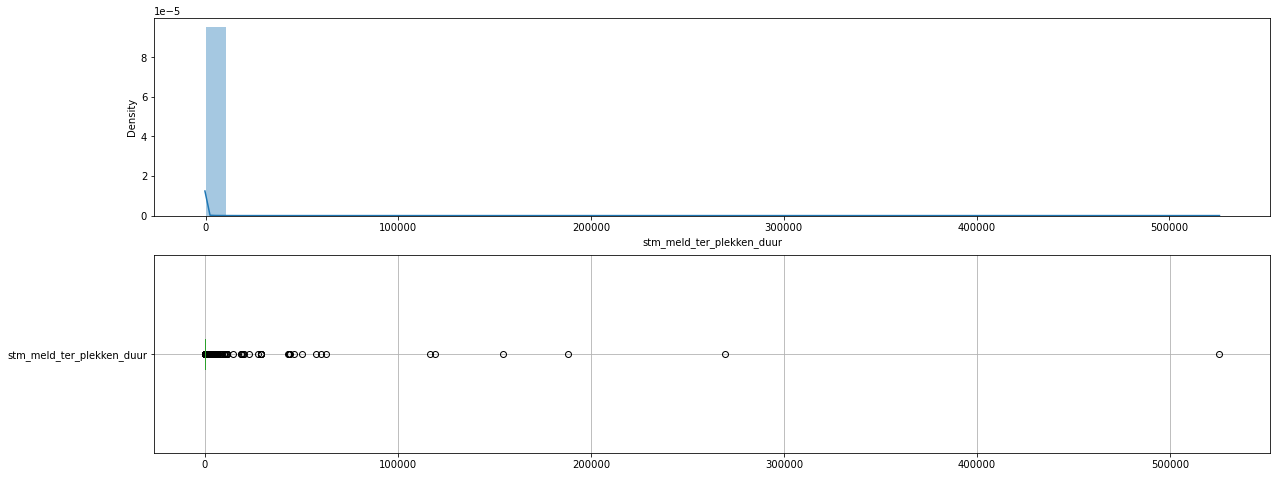

In [140]:
import seaborn as sns 
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_meld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_meld_ter_plekken_duur'], ax = ax2, vert=False)

In [180]:
table.corr()['stm_fh_duur'].sort_values()

stm_fh_status                 -0.097749
stm_contractgeb_gst           -0.058150
stm_tao_telling_mutatie       -0.042635
stm_reactie_duur              -0.039442
stm_oorz_code                 -0.035676
#stm_sap_meldnr               -0.021958
stm_meld_gebeld_duur          -0.000906
stm_km_tot_mld                 0.007227
stm_km_van_mld                 0.008820
stm_km_tot_gst                 0.009622
stm_km_van_gst                 0.018376
stm_geo_mld_uit_functiepl      0.024997
stm_meld_ter_plekken_duur      0.062536
stm_gebeld_ter_plekken_duur    0.063908
stm_progfh_gw_teller           0.079168
stm_prioriteit                 0.252518
stm_progfh_in_duur             0.432442
stm_fh_duur                    1.000000
Name: stm_fh_duur, dtype: float64